In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Let's build a brain
model = Sequential()

# First, we'll add a layer that looks at small parts of the picture
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Then, we'll add a layer that picks the most important parts
model.add(MaxPooling2D(pool_size=(2, 2)))

# We'll add another layer to look at the important parts more closely
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# And another layer to pick the most important parts again
model.add(MaxPooling2D(pool_size=(2, 2)))

# Now, we'll flatten the picture into a long line
model.add(Flatten())

# We'll add a layer to think about the line and make a guess
model.add(Dense(128, activation='relu'))

# Finally, we'll make a final guess about the number
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.8830 - loss: 0.4089
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9694 - loss: 0.1017
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9796 - loss: 0.0671
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9840 - loss: 0.0498
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9880 - loss: 0.0372
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9905 - loss: 0.0301
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9921 - loss: 0.0234
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9929 - loss: 0.0207
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9934 - loss: 0.0189
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9944 - loss: 0.0164


In [ ]:
img_path = 'thumb.jpg'
img = tf.keras.utils.load_img(img_path, color_mode="grayscale", target_size=(28, 28))
img_array = tf.keras.utils.img_to_array(img)
# img_array = 255 - img_array  # Invert colors if needed
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [ ]:
predictions = model.predict(img_array)
predicted_digit = np.argmax(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


Predicted digit: 5


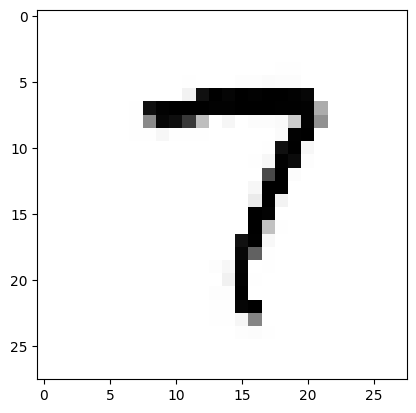

In [ ]:
print("Predicted digit:", predicted_digit)
plt.imshow(img_array[0], cmap='gray')
plt.show()